In [7]:
import numpy as np
import pandas as pd
import random

from arms.bernoulli import BernoulliArm
%matplotlib inline

In [11]:
class Random():
    def __init__(self):
        self.n_arms = 0
    
    def initialize(self, n_arms):
        self.n_arms = n_arms
    
    def select_arm(self):
        return np.random.randint(n_arms)
  
    def update(self, chosen_arm, reward):
        return

In [12]:
random.seed(1)
means = [0.1, 0.1, 0.1, 0.1, 0.9]
n_arms = len(means)
random.shuffle(means)
arms = list(map(lambda mu: BernoulliArm(mu), means))
best_arm = np.argmax(means)
print("Best arm is " + str(best_arm))

Best arm is 2


In [16]:
from testing_framework.tests import *

algo = Random()
algo.initialize(n_arms)
results = test_algorithm(algo, arms, 5000, 250)
dataframe = pd.DataFrame(np.array(results).T,columns=["Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])

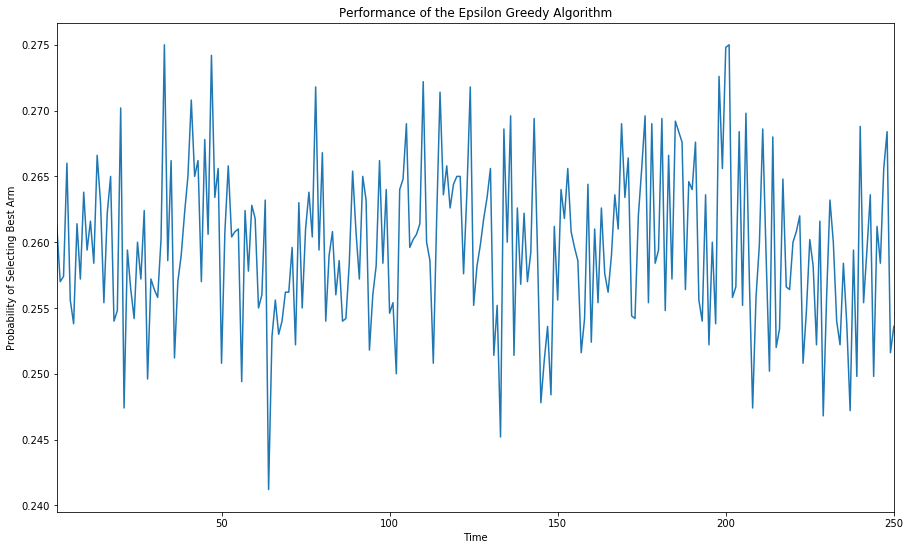

In [18]:
ax = dataframe.groupby("T").mean()['Reward'].plot(figsize=(15,9))
ax.set_title("Performance of the Epsilon Greedy Algorithm")
ax.set_ylabel('Probability of Selecting Best Arm');
ax.set_xlabel('Time');

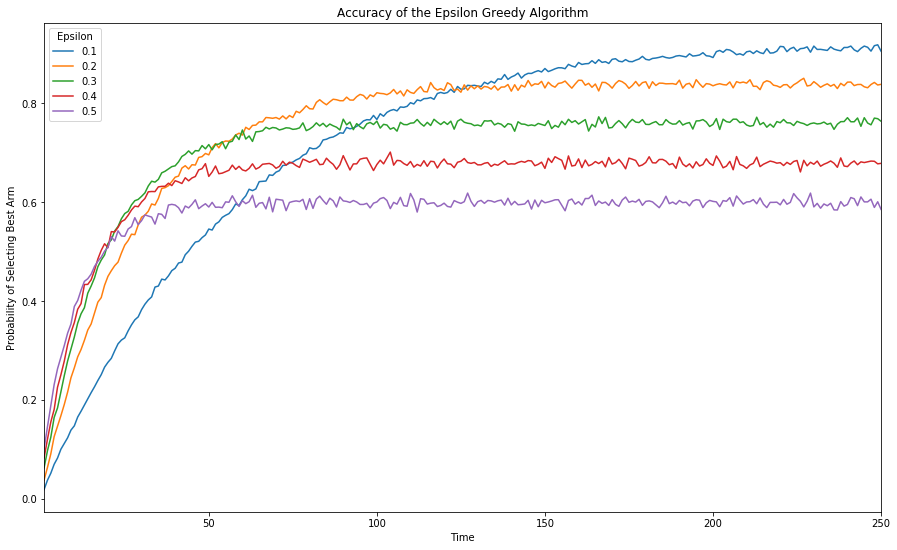

In [6]:
df_grouped = dataframe.groupby(["T","Epsilon","ChosenArm"]).count()/dataframe.Sim.max()
df_grouped  = df_grouped .reset_index()
ax = df_grouped[df_grouped['ChosenArm'] == float(best_arm)].pivot('T','Epsilon','Reward').plot(figsize=(15,9))
ax.set_title("Accuracy of the Epsilon Greedy Algorithm")
ax.set_ylabel('Probability of Selecting Best Arm');
ax.set_xlabel('Time');

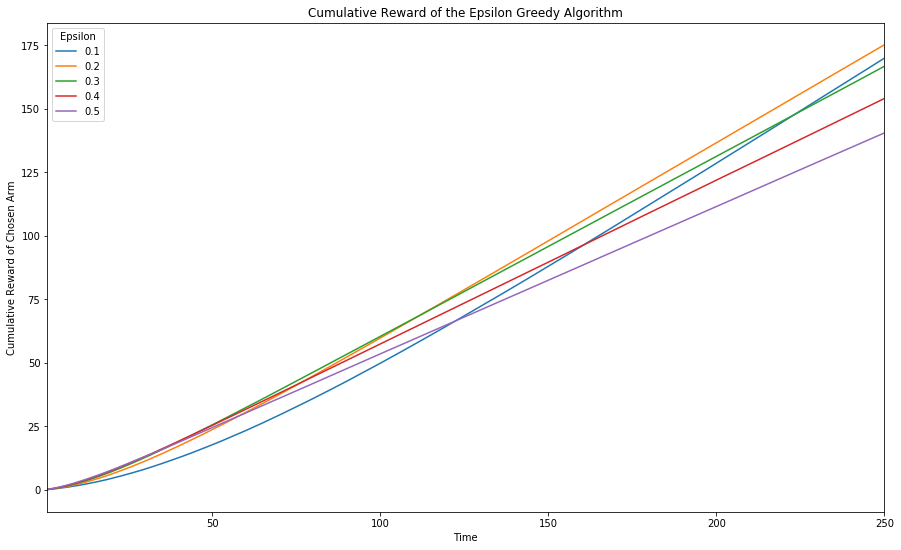

In [8]:
ax = dataframe.groupby(["T","Epsilon"]).mean().reset_index().pivot('T','Epsilon','CumulativeReward').plot(figsize=(15,9))
ax.set_title("Cumulative Reward of the Epsilon Greedy Algorithm")
ax.set_ylabel('Cumulative Reward of Chosen Arm');
ax.set_xlabel('Time');

In [10]:
dataframe.to_csv("Epsilon-greedy_results.csv",index=None)